In [1]:
import sys
import math
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


DIR = Path('..')
sys.path.append(str(DIR))

DATA_DIR = DIR/'data/'
OUT_DIR = DIR/'output/'

%load_ext autoreload
%autoreload 2

# Chapter 1

## Structure of Economic Data

Cross-Sectional Data
A cross-sectional data set consists of a sample of individuals, households, firms, cities,states, countries, or a variety of other units, taken at a given point in time.
An important feature of cross-sectional data is that we can often assume that they have been obtained by random sampling from the underlying population.

A time series data set consists of observations on a variable or several variables over time. Another feature of time series data that can require special attention is the data frequency
at which the data are collected. In economics, the most common frequencies are daily, weekly, monthly, quarterly, and annually.

Some data sets have both cross-sectional and time series features. To increase our sample size, we can form a pooled cross section by combining the two years. Pooling cross sections from different years is often an effective way of analyzing the effects of a new government policy.

A panel data (or longitudinal data) set consists of a time series for each cross-sectional member in the data set.The key feature of panel data that distinguishes them from a pooled cross section isthat the same cross-sectional units (individuals, firms, or counties in the preceding examples) are followed over a given time period.

## Causality and the Notion of Ceteris Paribus in Econometric Analysis

In most tests of economic theory, and certainly for evaluating public policy, the economist’s goal is to infer that one variable (such as education) has a causal effect on another variable (such as worker productivity). Simply finding an association between two or more variables might be suggestive, but unless causality can be established, it is rarely
compelling.
The notion of ceteris paribus—which means “other (relevant) factors being equal”— plays an important role in causal analysis.

# Chapter 2

## Simple Regression Model

Much of applied econometric analysis begins with the following premise: y and x are two variables, representing some population, and we are interested in “explaining y in terms of x,” or in “studying how y varies with changes in x.”

The following equation defines the simple linear regression model.The variable *u*, called the error term or disturbance in the relationship, represents factors other than x that affect y. A simple regression analysis effectively treats all factors affecting y other than x as being unobserved.

\begin{equation*}
y= \beta_0+\beta_1x+u \\
\end{equation*}

Assumption (Zero conditional mean assumption)

\begin{equation*}
E(u)=E(u|x)=0\\
Implies:\\
Cov(x,u)=E(xu)=0
\end{equation*}

Means: x must not contain information about the mean of the unobserved factors.

Means: The average value of the unobservables is the same across all slices of the population determined by the value of x.

Now the question is how to estimate $\beta_0$ and $\beta_1$. To do this, we need a "Random" sample of size n from the population. So we can write:

\begin{equation*}
y_i= \beta_0+\beta_1x_i+u_i \\
\end{equation*}

Here, $u_i$ is the error term for observation i because it contains all factors affecting $y_i$ other than $x_i$. The estimates are called the **ordinary least squares (OLS)** estimates of $\beta_0$ and $\beta_1$. To justify this name, for any $\hat{\beta}_0$ and $\hat{\beta}_1$ define a fitted value for y when $x=x_i$ as

\begin{equation*}
\hat{y}_i= \hat{\beta}_0+\hat{\beta}_1x_i \\
\end{equation*}

For the population of chief executive officers, let y be annual salary (salary) in thousands
of dollars. Thus, y = 856.3 indicates an annual salary of 856,300, and y = 1,452.6 indicates a salary of $1,452,600. Let x be the average return on equity (roe) for the CEO’s firm for the previous three years. (Return on equity is defined in terms of net income as a percentage of common equity.) For example, if roe 5 10, then average return on equity is 10%.
To study the relationship between this measure of firm performance and CEO compensation, we postulate the simple model

\begin{equation*}
salary=\beta_0 + \beta_1 roe + u
\end{equation*}

In [8]:
#Load sample data (source: http://lib.stat.cmu.edu/datasets/CPS_85_Wages)
"""
  1. salary                   1990 salary, thousands $
  2. pcsalary                 % change salary, 89-90
  3. sales                    1990 firm sales, millions $
  4. roe                      return on equity, 88-90 avg
  5. pcroe                    % change roe, 88-90
  6. ros                      return on firm's stock, 88-90
  7. indus                    =1 if industrial firm
  8. finance                  =1 if financial firm
  9. consprod                 =1 if consumer product firm
 10. utility                  =1 if transport. or utilties
 11. lsalary                  natural log of salary
 12. lsales                   natural log of sales
"""
df = pd.read_csv(DATA_DIR/'CEO Salary and Return on Equity.csv')
df.head()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.0,14.1,106.4,191,1,0,0,0,6.998509,10.225390
1,1001,32,9958.0,10.9,-30.6,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.9,23.5,-16.3,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.0,5.9,-25.7,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.2,13.8,-3.0,56,1,0,0,0,7.221105,9.988894


In [9]:
#regression using stats model library
model = smf.ols("salary ~ roe", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Wed, 27 Mar 2019   Prob (F-statistic):             0.0978
Time:                        14:12:26   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.901
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

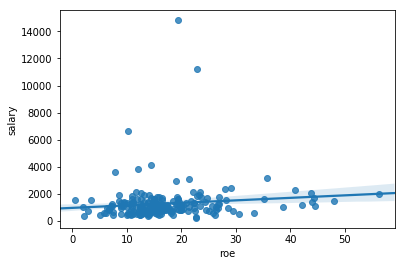

In [10]:
#Plot a regression model (E(AGE|EXPERIENCE)=B0+B1EXPERIENCE)
ax = sns.regplot(y='salary', x='roe', data=df)

where the intercept and slope estimates have been rounded to three decimal places; we use “salary hat” to indicate that this is an estimated equation. How do we interpret the equation? First, if the return on equity is zero, roe = 0, then the predicted salary is the intercept, 963.191, which equals 963,191 since salary is measured in thousands. Next, we can write the predicted change in salary as a function of the change in roe: $\Delta \hat{salary}=18.501 (\Delta roe) $ This means that if the return on equity increases by one percentage point, $\Delta roe=1$, then salary is predicted to change by about 18.5, or 18,500. Because it is a linear equation, this is the estimated change regardless of the initial salary.

The salary - roe regression explains 1.32% of the total variation in salaries. $R^2=0.0132$

Changes in Xi do not necessarily "cause" changes in Yi. Regression does not
imply causation. This causal relationship must first be established outside
of statistics (e.g., economic theory). In the case of OLS, in order to get a
proper causal interpretation, it is necessary to satisfy the zero conditional
mean condition (or "exogeneity assumption"). 


Variables Xi and Yi are not treated symmetrically. We try to predict the
values of the dependent variable, given the certain values of the independent
variable. So statement is "false".

## goodness-of-Fit

Define the total sum of squares (SST), the explained sum of squares (SSE), and the residual sum of squares (SSR) (also known as the sum of squared residuals), as follows:

\begin{equation*}
SST=\sum_{i=1}^n \left(y_i-\bar{y} \right)^2 \\
SSE=\sum_{i=1}^n \left(\hat{y}_i-\bar{y} \right)^2 \\
SSR=\sum_{i=1}^n \hat{u}_i^2 \\
SST = SSE + SSR
\end{equation*}

R2 is the ratio of the explained variation compared to the total variation; thus, it is interpreted as the fraction of the sample variation in y that is explained by x.The **R-squared** of the regression, sometimes called the **coefficient of determination**, is defined as

\begin{equation*}
R^2=SSE/SST=1-SSR/SST
\end{equation*}

In [11]:
#R-squared from the model
model.rsquared

0.013188624814144401

In [12]:
model.rsquared_adj

0.0084214201031016511

## Incorporating Nonlinearities in Simple Regression

it is rather easy to incorporate many nonlinearities into simple regression analysis by appropriately defining the dependent and independent variables.

For the population of people in the workforce in 1976, let y 5 wage, where wage is
measured in dollars per hour. Thus, for a particular person, if wage 5 6.75, the hourly
wage is 6.75. Let x 5 educ denote years of schooling; for example, educ 5 12 corresponds
to a complete high school education. Since the average wage in the sample is
5.90, the Consumer Price Index indicates that this amount is equivalent to 19.06 in
2003 dollars.

In [13]:
#Load sample data 
"""
  1. wage                     average hourly earnings
  2. educ                     years of education
  3. exper                    years potential experience
  4. tenure                   years with current employer
  5. nonwhite                 =1 if nonwhite
  6. female                   =1 if female
  7. married                  =1 if married
  8. numdep                   number of dependents
  9. smsa                     =1 if live in SMSA
 10. northcen                 =1 if live in north central U.S
 11. south                    =1 if live in southern region
 12. west                     =1 if live in western region
 13. construc                 =1 if work in construc. indus.
 14. ndurman                  =1 if in nondur. manuf. indus.
 15. trcommpu                 =1 if in trans, commun, pub ut
 16. trade                    =1 if in wholesale or retail
 17. services                 =1 if in services indus.
 18. profserv                 =1 if in prof. serv. indus.
 19. profocc                  =1 if in profess. occupation
 20. clerocc                  =1 if in clerical occupation
 21. servocc                  =1 if in service occupation
 22. lwage                    log(wage)
 23. expersq                  exper^2
 24. tenursq                  tenure^2
"""
df = pd.read_csv(DATA_DIR/'wage1.csv')
df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [47]:
#regression using stats model library
model = smf.ols("wage ~ educ", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):           2.78e-22
Time:                        17:19:42   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.187      -2.250       0.441
educ           0.5414      0.053     10.167      0.000       0.437       0.646
==============================================================================
Omnibus:                      212.554   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.843
Skew:                           1.861   Prob(JB):                    3.79e-176
Kurtosis:                       7.797   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
print(model.params)
print('R2: ', model.rsquared)

Intercept   -0.904852
educ         0.541359
dtype: float64
R2:  0.164757512497


Intercept: A person with zero years of education has a wage of \\$-0.90 per hour.
If educ increases by 1 year, then wage is predicted to increase by \\$0.54 (irrespective of the starting level).

We must interpret this equation with caution. The intercept of 20.90 literally means that a person with no education has a predicted hourly wage of 290¢ an hour. This, of course, is silly. It turns out that only 18 people in the sample of 526 have less than eight years of salary education. Consequently, it is not surprising that the regression line does poorly at very low levels of education.The slope estimate in the model implies that one more year of education increases hourly
wage by 54 ¢ an hour.

Probably a better characterization of how wage changes with education is that each year of education increases wage by a constant percentage. A model that gives (approximately) a constant percentage effect is

\begin{equation*}
E(wage|educ)=e^{\beta_0+\beta_1educ}\\
\ln{(wage)}=\beta_0 + \beta_1 educ + u
\end{equation*}

where log denotes the natural logarithm. In particular, if $\Delta u=0$ then

\begin{equation*}
\beta_1=\frac{\delta ln(wage)}{\delta educ} = \frac{1}{wage}*\frac{\delta wage}{\delta educ}=\frac{\frac{\delta wage}{wage}}{\delta educ}=\frac{\%\Delta wage}{100\Delta educ}\\
\%\Delta wage=(100\beta_1)\Delta educ
\end{equation*}


\begin{equation*}
math10=\beta_0 + \beta_1 \ln{(enroll)} + u\\
\beta_1=\frac{\delta math10}{\delta \ln{(enroll)}}=\frac{\delta math10}{\frac{\delta enroll}{enroll}}=\frac{100\Delta math10}{\%\Delta enroll}\\
\Delta math10=\frac{\beta_1}{100}\%\Delta enroll\\
\end{equation*}

A summary of log-log models are as below

|Modle|Dependent Variable|Independent Variable|Interpretation of $\beta_1$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|-----|------------------|--------------------|-------------------------------------------------------------|
|Level-level|y|x|$\Delta y = \beta_1 \Delta x$|
|Level-log|y|$\log(x)$|$\Delta y = (\beta_1/100)\% \Delta x$|
|log-level|$\log(y)$|x|$\%\Delta y = (100\beta_1) \Delta x$|
|log-log|$\log(y)$|$\log(x)$|$\%\Delta y = \beta_1 \%\Delta x$|

In [45]:
#regression using stats model library
df['ln_wage']=df['wage'].map(math.log)
model = smf.ols("ln_wage ~ educ", df).fit()
print(model.params)
print('R2: ', model.rsquared)

Intercept    0.583773
educ         0.082744
dtype: float64
R2:  0.185806479332


wage increases by 8.3% for every additional year of education ("return to education"). The growth rate of wage is 8.3% per year of education.

## Expected Values and Variances of the OLS Estimators
https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html

### Assumption SLR.1: Linear in Parameters

\begin{equation*}
y= \beta_0+\beta_1x+u \\
\end{equation*}

where $\beta_0$ and $\beta_1$ are the population intercept and slope parameters, respectively.

In [35]:
# Linearity¶
# Harvey-Collier multiplier test for Null hypothesis that 
# the linear specification is correct:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(model)
lzip(name, test)

[('t value', -2.5094478671921645), ('p value', 0.01239370073026499)]

## Assumption SLR.2: Random Sampling

We have a random sample of size n, {(xi,yi): i = 1, 2, …, n}, following the population model.

## Assumption SLR.3 Sample Variation in the Explanatory Variable

The sample outcomes on x, namely, {xi, i = 1, …, n}, are not all the same value.

## Assumption SLR.4 Zero Conditional Mean

The error u has an expected value of zero given any value of the explanatory variable. In
other words,
\begin{equation*}
E(u)=E(u|x)=0 
\end{equation*}

## Theorem 2.1 Unbiasedness of OLS:

\begin{equation*}
E(\hat{\beta}_0)=\beta_0 \\
,and \\
E(\hat{\beta}_1)=\beta_1
\end{equation*}

## Assumption SLR.5 Homoskedasticity

\begin{equation*}
Var(u|x)=\delta^2 \end{equation*}

The value of x must contain no information about the variability of u.

In [29]:
# Heteroskedasticity tests
# The tests the hypothesis that the residual variance does 
# not depend on the variables in x in the form
# Breush-Pagan test:

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 15.305630125327152),
 ('p-value', 9.1443564130804054e-05),
 ('f-value', 15.704402983020215),
 ('f p-value', 8.4316808731358571e-05)]

In [31]:
# Goldfeld-Quandt test

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 0.56672570998324423), ('p-value', 0.99999735045003335)]

## Theorem 2.2 Sampling Variances of the OLS Estimators

\begin{equation*}
Var(\hat{\beta}_1)=\frac{\delta^2}{\sum_{i=1}^n \left(x_i-\bar{x} \right)^2} =\frac{\delta^2}{SST_x} \\
Var(\hat{\beta}_0)=\frac{\delta^2n^{-1}\sum_{i=1}^nX_i^2}{\sum_{i=1}^n \left(x_i-\bar{x} \right)^2} \\
\end{equation*}

## Theorem 2.3 Unbiased Estimation of $\delta^2$

\begin{equation*}
E\left(\hat{\delta}^2\right)=\delta^2 \\
\end{equation*}

An unbiased estimator of $\delta^2$ is given by

\begin{equation*}
\hat\delta^2=\frac{1}{n-2}\sum_{i=1}^n\hat u_i^2
\end{equation*}

In [33]:
# Normality of the residuals
# Jarque-Bera test:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
lzip(name, test)

[('Jarque-Bera', 807.843301330239),
 ('Chi^2 two-tail prob.', 3.7936389434141452e-176),
 ('Skew', 1.8606787960151654),
 ('Kurtosis', 7.797006157504788)]

In [20]:
# Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(model.resid)
lzip(name, test)

[('Chi^2', 212.55444495696761),
 ('Two-tail probability', 6.9885765335337843e-47)]

In [21]:
# Influence tests
# Once created, an object of class OLSInfluence holds attributes and 
# methods that allow users to assess the influence of each observation. 
# For example, we can compute and extract the first few rows of 
# DFbetas by:

from statsmodels.stats.outliers_influence import OLSInfluence
test_class = OLSInfluence(model)
test_class.dfbetas[:5,:]

array([[-0.01933372,  0.01424431],
       [-0.01257424,  0.00618265],
       [-0.02032582,  0.01497525],
       [ 0.06106159, -0.05516005],
       [-0.00155785,  0.00076598]])

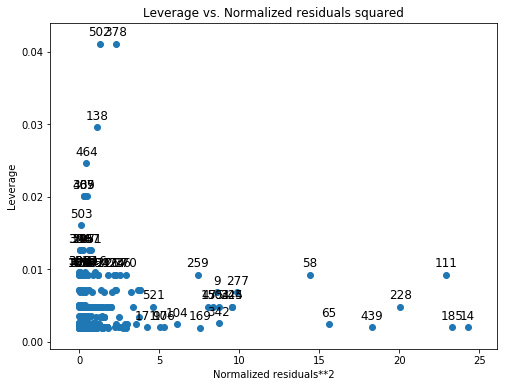

In [22]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(model, ax = ax)

In [23]:
# Multicollinearity
# Condition number:

np.linalg.cond(model.model.exog)

60.161207366303749

# Chapter 3 Multiple Regression Analysis

Under the CLM assumptions MLR.1 through MLR.6, conditional on the sample values of the independent variables,

\begin{equation*}
\hat\beta_j \~ Normal[\beta_j,Var(\hat\beta_j)],\\
\end{equation*}

where $Var(\hat\beta_j)=\frac{\sigma^2}{SST_j(1-R_j^2)}$ . Therefore,

\begin{equation*}
\frac{\hat\beta_j - \beta_j}{sd(\hat\beta_j)}\~Normal(0,1)
\end{equation*}

But we don't have $sd(\hat\beta_j)$ therefore the standardization is done using the estimated standard deviation(=standard error) $se(\hat\beta_j)$, therefore Under the CLM assumptions MLR.1 through MLR.6,

\begin{equation*}
\frac{\hat\beta_j - \beta_j}{se(\hat\beta_j)}\~t_{n-k-1}
\end{equation*}

df is degrees of freedom, n is sample size, k is number of variables

Test $H_0:\beta_j=0$ against $H_0:\beta_j>0$

\begin{equation*}
\hat{\ln(wage)} = \underset{(0.104)}{2.284}+\underset{(0.007)}{0.092educ}+\underset{(0.0017)}{0.0041exper}+\underset{(0.003)}{0.0022tenure}\\
n=526, R^2=0.316
\end{equation*}

t-statistic: $t_{exper}=\frac{0.0041}{0.0017}\approx2.41$  
degrees of freedom: $df=n-k-1=526-3-1=522$  
critical value: $c_{0.05}=1.645$  
$t_{exper}>c_{0.05}$

Test $H_0:\beta_j=0$ against $H_0:\beta_j<0$

Test whether smaller school size leads to better student performance.

\begin{equation*}
\hat{math10} = \underset{(6.113)}{2.274}+\underset{(0.00010)}{0.00046totcomp}+\underset{(0.040)}{0.048staff}+\underset{(0.00022)}{0.00020enroll}\\
n=408, R^2=0.0541
\end{equation*}

t-statistic: $t_{enroll}=\frac{-0.00020}{0.00022}\approx-0:91$
degrees of freedom: $df=n-k-1=408-3-1=404$  
critical value: $c_{0.05}=-1.65$  
$t_{enroll}>c_{0.05}$

Test $H_0:\beta_j=0$ against $H_0:\beta_j\neq0$

Note: for $\alpha=\%5$ we should use $t_{\frac{\alpha}{2},df}$

Test $H_0:\beta_j=-1$ against $H_1:\beta_j\neq-1$

\begin{equation*}
t =\frac{\hat\beta_j - \beta_j}{se(\hat\beta_j)}=\frac{\hat\beta_j - (-1)}{se(\hat\beta_j)}\
\end{equation*}

We reject $H_0$ if $|t|>c$, where c is a two-tailed critical value. If $H_0$ is rejected, we say that $\hat\beta_j$ is statistically different from negative one at the appropriate significance level.

Confidence intervals (also called interval estimates) provide a range of likely values for the population parameter, not "just" a point estimate.

At 0:95%: confidence level:  
lower bound of the CI: $\hat\beta_j-c_{0.05}*se(\hat\beta_j)$      
upper bound of the CI: $\hat\beta_j+c_{0.05}*se(\hat\beta_j)$  

\begin{equation*}
\hat{\ln(rd)} = \underset{(0.47)}{-4.38}+\underset{(0.060)}{1.048\ln(sales)}+\underset{(0.0128)}{0.0217profmargin}\\
n=32, R^2=0.918
\end{equation*}

$1.048\pm2.045\times0.060 = (0.961, 1.21)$ The effect of sales on R&D is relatively precisely estimated as the interval is narrow.  
$0.0217\pm2.045\times0.0218 = (-0.0045, 0.0479)$ The effect of the profit margin is imprecisely estimated as the interval is very wide. It is not even statistically significant because zero lies in the interval.

Test $H_0:\beta_1=\beta_2$ against $H_1:\beta_1<\beta_2$

Test $H_0:\beta_1-\beta_2=0$ against $H_1:\beta_1-\beta_2<0$

Solution: Define $\theta=\beta_1-\beta_2$ and test $H_0:\theta_1=0$ against $H_1:\theta_1<0$ Then

\begin{equation*}
\hat{\ln(wage)} = \beta_0+\beta_1jc+\beta_2univ+\beta_3exper\\
\hat{\ln(wage)} = \beta_0+(\theta_1+\beta_2)jc+\beta_2univ+\beta_3exper\\
\hat{\ln(wage)} = \beta_0+\theta_1jc+\beta_2(jc+univ)+\beta_3exper\\
\end{equation*}

Result:

\begin{equation*}
\hat{\ln(wage)} = \underset{(0.21)}{1.472}+\underset{(0.0069)}{0.0102jc}+\underset{(0.0023)}{0.0769(jc+univ)}+\underset{(0.0002)}{0.0049exper}\\
n=6763, R^2=0.222
\end{equation*}

t-statistic: $t_{jc}=\frac{-0.0102}{0.0069}\approx-1.48$
degrees of freedom: $df=n-k-1=6763-3-1=6759$  
critical value: $c_{0.026}=-1.96$  
p-value: $p-value = P(t-ratio<-1.48) = 2\times0.035=0.070$  
Confidence Interval: $-0.0102\pm1.96\times0.0069=(-0.0237,0.0003)$  
$H_0$ is rejected at 10% level but not at 5% level.

Test $H_0:\beta_3=0, \beta_4=0, \beta_5=0$ against $H_1:H_0$ is not true

Estimation of the unrestricted model **(ur)**:

\begin{equation*}
\hat{\ln(salary)} = \underset{(0.29)}{11.19}+\underset{(0.0121)}{0.689years}+\underset{(0.0026)}{0.126gamesyr)}+\\
\underset{(0.00110)}{0.00098bavg}+\underset{(0.0161)}{0.0144hrunsyr}+\underset{(0.0072)}{0.0108rbisyr}\\
n=353,SSR = 183.186, R^2=0.6275
\end{equation*}

Note, none of the performance variables is individually statistically significant

Estimation of the restricted model **(r)**:

\begin{equation*}
\hat{\ln(salary)} = \underset{(0.11)}{11.12}+\underset{(0.0125)}{0.713years}+\underset{(0.0013)}{0.0202gamesyr}+\\
n=353,SSR = 198.311, R^2=0.5971
\end{equation*}

\begin{equation*}
F=\frac{(SSR_r-SSR_{ur})/q}{(SSR_{ur}/(n-k-1)}\~F_{q,n-k-1}
\end{equation*}

q: Numerator degrees of freedom $(df_r - df_{ur} )$ = number of restrictions. (the number of variables droped in r model)

n - k - 1: Denominator degrees of freedom.

The relative increase of the sum of squared residuals when going from H1 to H0
follows a F-distribution (if H0 is correct)

\begin{equation*}
F=\frac{(SSR_r-SSR_{ur})/q}{(SSR_{ur}/(n-k-1)}=\frac{(198.311-183.186)/3}{183.186/(353-5-1)}\\
F\~F_{3,347}\Rightarrow c_{0.01}=3.78\\
P(F > 9.55) = 0.000
\end{equation*}

The null hypothesis is overwhelmingly rejected (even at very small significance
levels).

The three variables are jointly signicant, they were not signicant when tested individually, the likely reason is multicollinearity between them.

Test of overall significance: all exlanatory variables are not useful in explaining the dependent variable

\begin{equation*}
F=\frac{(SSR_r-SSR_{ur})/q}{(SSR_{ur}/(n-k-1)}=\frac{R^2/k}{(1-R^2)/(n-k-1)}\~F_{q,n-k-1}\\
\end{equation*}

Testing Other Hypotheses about $\beta_j$
We reject $H_0$ if |t| > c, where c is a two-tailed critical value. If $H_0$ is rejected, we
say that $\beta_j$ is statistically different from negative one at the appropriate signicance
level.

In [ ]:
#Other Model attributes
"""
aic – Akaike’s information criteria. For a model with a constant −2llf+2(df_model+1). For a model without a constant −2llf+2(df_model).
bic – Bayes’ information criteria. For a model with a constant −2llf+log(n)(df_model+1). For a model without a constant −2llf+log(n)(df_model)
bse – The standard errors of the parameter estimates.
pinv_wexog – See specific model class docstring
centered_tss – The total (weighted) sum of squares centered about the mean.
cov_HC0 – Heteroscedasticity robust covariance matrix. See HC0_se below.
cov_HC1 – Heteroscedasticity robust covariance matrix. See HC1_se below.
cov_HC2 – Heteroscedasticity robust covariance matrix. See HC2_se below.
cov_HC3 – Heteroscedasticity robust covariance matrix. See HC3_se below.
cov_type – Parameter covariance estimator used for standard errors and t-stats
df_model – Model degrees of freedom. The number of regressors p. Does not include the constant if one is present
df_resid – Residual degrees of freedom. n - p - 1, if a constant is present. n - p if a constant is not included.
ess – Explained sum of squares. If a constant is present, the centered total sum of squares minus the sum of squared residuals. If there is no constant, the uncentered total sum of squares is used.
fvalue – F-statistic of the fully specified model. Calculated as the mean squared error of the model divided by the mean squared error of the residuals.
f_pvalue – p-value of the F-statistic
fittedvalues – The predicted values for the original (unwhitened) design.
het_scale – adjusted squared residuals for heteroscedasticity robust standard errors. Is only available after HC#_se or cov_HC# is called. See HC#_se for more information.
history – Estimation history for iterative estimators
HC0_se – White’s (1980) heteroskedasticity robust standard errors. Defined as sqrt(diag(X.T X)^(-1)X.T diag(e_i^(2)) X(X.T X)^(-1) where e_i = resid[i] HC0_se is a cached property. When HC0_se or cov_HC0 is called the RegressionResults instance will then have another attribute het_scale, which is in this case is just resid**2.
HC1_se – MacKinnon and White’s (1985) alternative heteroskedasticity robust standard errors. Defined as sqrt(diag(n/(n-p)*HC_0) HC1_see is a cached property. When HC1_se or cov_HC1 is called the RegressionResults instance will then have another attribute het_scale, which is in this case is n/(n-p)*resid**2.
HC2_se – MacKinnon and White’s (1985) alternative heteroskedasticity robust standard errors. Defined as (X.T X)^(-1)X.T diag(e_i^(2)/(1-h_ii)) X(X.T X)^(-1) where h_ii = x_i(X.T X)^(-1)x_i.T HC2_see is a cached property. When HC2_se or cov_HC2 is called the RegressionResults instance will then have another attribute het_scale, which is in this case is resid^(2)/(1-h_ii).
HC3_se – MacKinnon and White’s (1985) alternative heteroskedasticity robust standard errors. Defined as (X.T X)^(-1)X.T diag(e_i^(2)/(1-h_ii)^(2)) X(X.T X)^(-1) where h_ii = x_i(X.T X)^(-1)x_i.T HC3_see is a cached property. When HC3_se or cov_HC3 is called the RegressionResults instance will then have another attribute het_scale, which is in this case is resid^(2)/(1-h_ii)^(2).
model – A pointer to the model instance that called fit() or results.
mse_model – Mean squared error the model. This is the explained sum of squares divided by the model degrees of freedom.
mse_resid – Mean squared error of the residuals. The sum of squared residuals divided by the residual degrees of freedom.
mse_total – Total mean squared error. Defined as the uncentered total sum of squares divided by n the number of observations.
nobs – Number of observations n.
normalized_cov_params – See specific model class docstring
params – The linear coefficients that minimize the least squares criterion. This is usually called Beta for the classical linear model.
pvalues – The two-tailed p values for the t-stats of the params.
resid – The residuals of the model.
resid_pearson – wresid normalized to have unit variance.
rsquared – R-squared of a model with an intercept. This is defined here as 1 - ssr/centered_tss if the constant is included in the model and 1 - ssr/uncentered_tss if the constant is omitted.
rsquared_adj – Adjusted R-squared. This is defined here as 1 - (nobs-1)/df_resid * (1-rsquared) if a constant is included and 1 - nobs/df_resid * (1-rsquared) if no constant is included.
scale – A scale factor for the covariance matrix. Default value is ssr/(n-p). Note that the square root of scale is often called the standard error of the regression.
ssr – Sum of squared (whitened) residuals.
uncentered_tss – Uncentered sum of squares. Sum of the squared values of the (whitened) endogenous response variable.
wresid – The residuals of the transformed/whitened regressand and regressor(s)
"""

In [ ]:
model.resid